### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 30662.1738
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 30415.2500
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 30189.7344
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 29971.0215
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 29755.4531
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 29539.8027
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 29320.8301
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 29096.0234
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 28861.0781
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 28610.8027
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 28339.6328
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 28041.6895
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 27711.4121
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 27356.7402
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50

### Predicting For the next 10 data

In [9]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[223.21333]
1 day input [196.         210.         223.21333313]
1 day output [[233.46312]]
2 day input [210.         223.21333313 233.46311951]
2 day output [[246.24881]]
3 day input [223.21333 233.46312 246.24881]
3 day output [[258.18893]]
4 day input [233.46312 246.24881 258.18893]
4 day output [[268.95724]]
5 day input [246.24881 258.18893 268.95724]
5 day output [[281.05466]]
6 day input [258.18893 268.95724 281.05466]
6 day output [[292.59375]]
7 day input [268.95724 281.05466 292.59375]
7 day output [[303.79886]]
8 day input [281.05466 292.59375 303.79886]
8 day output [[315.74365]]
9 day input [292.59375 303.79886 315.74365]
9 day output [[327.42822]]
[np.float32(223.21333), np.float32(233.46312), np.float32(246.24881), np.float32(258.18893), np.float32(268.95724), np.float32(281.05466), np.float32(292.59375), np.float32(303.79886), np.float32(315.74365), np.float32(327.42822)]


In [10]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [11]:
len(timeseries_data)

9

In [12]:
lst_output

[np.float32(223.21333),
 np.float32(233.46312),
 np.float32(246.24881),
 np.float32(258.18893),
 np.float32(268.95724),
 np.float32(281.05466),
 np.float32(292.59375),
 np.float32(303.79886),
 np.float32(315.74365),
 np.float32(327.42822)]

In [14]:
lst_output

[np.float32(223.21333),
 np.float32(233.46312),
 np.float32(246.24881),
 np.float32(258.18893),
 np.float32(268.95724),
 np.float32(281.05466),
 np.float32(292.59375),
 np.float32(303.79886),
 np.float32(315.74365),
 np.float32(327.42822)]

### Visualizaing The Output

In [15]:
import matplotlib.pyplot as plt

In [16]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

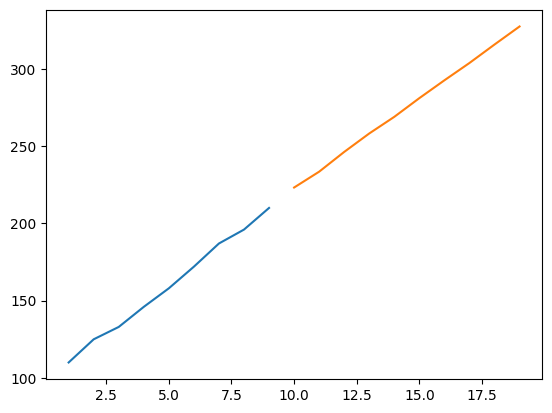

In [17]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
